# Telecommunication Industry Data Analysis

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import statistics
import warnings
import seaborn as sns
import random as rd
import sys

In [4]:
sys.path.append ("../Scripts")
from Scripts import Read_Data

ImportError: cannot import name 'Read_Data' from 'Scripts' (unknown location)

In [3]:
from scipy.stats import skew
from sklearn.preprocessing import MinMaxScaler
from random import sample
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs

In [ ]:
pip install streamlit
pip install scipy
pip install sklearn
pip install seaborn
pip install sklearn.datasets.samples_generator

## Reading the data

In [11]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_column', None)# To expand the number of viable columns in the dataframe
data = pd.read_excel('../Data/Week1_challenge_data_source.xlsx', na_values=['?', None])
data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,NaN,NaN,44.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,3330.0,37882.0,1.321510e+09,undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [12]:
data.columns.tolist()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Socia

In [15]:
# to display number of rows and columns 
print(f" There are {data.shape[0]} rows and {data.shape[1]} columns")

 There are 150001 rows and 55 columns


In [16]:
data.isna().mean().round(4)*100

Bearer Id                                    0.66
Start                                        0.00
Start ms                                     0.00
End                                          0.00
End ms                                       0.00
Dur. (ms)                                    0.00
IMSI                                         0.38
MSISDN/Number                                0.71
IMEI                                         0.38
Last Location Name                           0.77
Avg RTT DL (ms)                             18.55
Avg RTT UL (ms)                             18.54
Avg Bearer TP DL (kbps)                      0.00
Avg Bearer TP UL (kbps)                      0.00
TCP DL Retrans. Vol (Bytes)                 58.76
TCP UL Retrans. Vol (Bytes)                 64.43
DL TP < 50 Kbps (%)                          0.50
50 Kbps < DL TP < 250 Kbps (%)               0.50
250 Kbps < DL TP < 1 Mbps (%)                0.50
DL TP > 1 Mbps (%)                           0.50


In [17]:
data.shape

(150001, 55)

## Data Cleaning

In [13]:
# Dropping rows with columns containing unpredictable Identifiers: IMSI, MSISDN/Number, IMEI, Handset Manufacturer, Handset Type
df_dropped= data.dropna(subset=['IMSI', 'MSISDN/Number', 'IMEI', 'Handset Manufacturer', 'Handset Type', 'Last Location Name'])
df_dropped.shape

(148346, 55)

In [14]:
df_dropped.isna().mean().round(4)*100

Bearer Id                                    0.00
Start                                        0.00
Start ms                                     0.00
End                                          0.00
End ms                                       0.00
Dur. (ms)                                    0.00
IMSI                                         0.00
MSISDN/Number                                0.00
IMEI                                         0.00
Last Location Name                           0.00
Avg RTT DL (ms)                             18.60
Avg RTT UL (ms)                             18.59
Avg Bearer TP DL (kbps)                      0.00
Avg Bearer TP UL (kbps)                      0.00
TCP DL Retrans. Vol (Bytes)                 59.11
TCP UL Retrans. Vol (Bytes)                 64.73
DL TP < 50 Kbps (%)                          0.46
50 Kbps < DL TP < 250 Kbps (%)               0.46
250 Kbps < DL TP < 1 Mbps (%)                0.46
DL TP > 1 Mbps (%)                           0.46


In [15]:
df_dropped.isna().sum()

Bearer Id                                        0
Start                                            0
Start ms                                         0
End                                              0
End ms                                           0
Dur. (ms)                                        0
IMSI                                             0
MSISDN/Number                                    0
IMEI                                             0
Last Location Name                               0
Avg RTT DL (ms)                              27598
Avg RTT UL (ms)                              27578
Avg Bearer TP DL (kbps)                          0
Avg Bearer TP UL (kbps)                          0
TCP DL Retrans. Vol (Bytes)                  87681
TCP UL Retrans. Vol (Bytes)                  96029
DL TP < 50 Kbps (%)                            688
50 Kbps < DL TP < 250 Kbps (%)                 688
250 Kbps < DL TP < 1 Mbps (%)                  688
DL TP > 1 Mbps (%)             

In [21]:
# Functions to backward fill and forward fill columns  
def fix_missing_ffill(df, col):
    df[col] = df[col].fillna(method='ffill',axis = 1)
    return df[col]


def fix_missing_bfill(df, col):
    df[col] = df[col].fillna(method='bfill')
    return df[col]


In [22]:
# Functions to fill missing columns with mean, median, mode
#using median
def fix_missing_median():
    df_Med=df['Column'].fillna(df['column'].median(), inplace=True)
    return df_Med
  
# Using mean
def fix_missing_mean():
    df_mean=df['column'].fillna(int(df['column'].mean()), inplace=True)
    return df_mean
  
# Using mode
def fix_missing_mode():
    df_mode=df['column'].fillna(int(df['Salary'].mode()), inplace=True)
    return df_mode
# By Interpolation
def fix_missing_interpolation_fffil():
    df_clean = df_dropped.interpolate(method='ffill')
    return df_clean
def fix_missing_interpolation_bffil():  
    df_clean = df_dropped.interpolate(method='bfill')
    return df_clean



In [23]:
# Calculating skewness of each column 
df_dropped.skew(axis='index', skipna=True)

Bearer Id                                     0.021424
Start ms                                      0.000499
End ms                                       -0.000738
Dur. (ms)                                     3.969863
IMSI                                       -269.208189
MSISDN/Number                               331.498405
IMEI                                          1.068722
Avg RTT DL (ms)                              67.061903
Avg RTT UL (ms)                              28.611111
Avg Bearer TP DL (kbps)                       2.589701
Avg Bearer TP UL (kbps)                       4.496712
TCP DL Retrans. Vol (Bytes)                  15.844908
TCP UL Retrans. Vol (Bytes)                  83.299761
DL TP < 50 Kbps (%)                          -2.302061
50 Kbps < DL TP < 250 Kbps (%)                3.282171
250 Kbps < DL TP < 1 Mbps (%)                 4.575920
DL TP > 1 Mbps (%)                            5.359140
UL TP < 10 Kbps (%)                          -8.997207
10 Kbps < 

In [16]:
# Using mean to fill all missing values 
df_dropped['Avg RTT DL (ms)'].fillna(int(df_dropped['Avg RTT DL (ms)'].mean()), inplace=True)
df_dropped['Avg RTT UL (ms)'].fillna(int(df_dropped['Avg RTT UL (ms)'].mean()), inplace=True)
df_dropped['TCP DL Retrans. Vol (Bytes)'].fillna(int(df_dropped['TCP DL Retrans. Vol (Bytes)'].mean()), inplace=True)
df_dropped['TCP UL Retrans. Vol (Bytes)'].fillna(int(df_dropped['TCP UL Retrans. Vol (Bytes)'].mean()), inplace=True)
df_dropped['DL TP < 50 Kbps (%)'].fillna(int(df_dropped['DL TP < 50 Kbps (%)'].mean()), inplace=True)
df_dropped['50 Kbps < DL TP < 250 Kbps (%)'].fillna(int(df_dropped['50 Kbps < DL TP < 250 Kbps (%)'].mean()), inplace=True)
df_dropped['250 Kbps < DL TP < 1 Mbps (%)'].fillna(int(df_dropped['250 Kbps < DL TP < 1 Mbps (%)'].mean()), inplace=True)
df_dropped['DL TP > 1 Mbps (%)'].fillna(int(df_dropped['DL TP > 1 Mbps (%)'].mean()), inplace=True)
df_dropped['UL TP < 10 Kbps (%)'].fillna(int(df_dropped['UL TP < 10 Kbps (%)'].mean()), inplace=True)
df_dropped['10 Kbps < UL TP < 50 Kbps (%)'].fillna(int(df_dropped['10 Kbps < UL TP < 50 Kbps (%)'].mean()), inplace=True)
df_dropped['10 Kbps < UL TP < 50 Kbps (%)'].fillna(int(df_dropped['10 Kbps < UL TP < 50 Kbps (%)'].mean()), inplace=True)
df_dropped['50 Kbps < UL TP < 300 Kbps (%)'].fillna(int(df_dropped['50 Kbps < UL TP < 300 Kbps (%)'].mean()), inplace=True)
df_dropped['UL TP > 300 Kbps (%)'].fillna(int(df_dropped['UL TP > 300 Kbps (%)'].mean()), inplace=True)
df_dropped['HTTP DL (Bytes)'].fillna(int(df_dropped['HTTP DL (Bytes)'].mean()), inplace=True)
df_dropped['HTTP UL (Bytes)'].fillna(int(df_dropped['HTTP UL (Bytes)'].mean()), inplace=True)
df_dropped['Nb of sec with 125000B < Vol DL'].fillna(int(df_dropped['Nb of sec with 125000B < Vol DL'].mean()), inplace=True)
df_dropped['Nb of sec with 1250B < Vol UL < 6250B'].fillna(int(df_dropped['Nb of sec with 1250B < Vol UL < 6250B'].mean()), inplace=True)
df_dropped['Nb of sec with 31250B < Vol DL < 125000B'].fillna(int(df_dropped['Nb of sec with 31250B < Vol DL < 125000B'].mean()), inplace=True)
df_dropped['Nb of sec with 37500B < Vol UL'].fillna(int(df_dropped['Nb of sec with 37500B < Vol UL'].mean()), inplace=True)
df_dropped['Nb of sec with 6250B < Vol DL < 31250B'].fillna(int(df_dropped['Nb of sec with 6250B < Vol DL < 31250B'].mean()), inplace=True)
df_dropped['Nb of sec with 6250B < Vol UL < 37500B'].fillna(int(df_dropped['Nb of sec with 6250B < Vol UL < 37500B'].mean()), inplace=True)
df_dropped['Nb of sec with Vol DL < 6250B'].fillna(int(df_dropped['Nb of sec with Vol DL < 6250B'].mean()), inplace=True)
df_dropped['Nb of sec with Vol UL < 1250B'].fillna(int(df_dropped['Nb of sec with Vol UL < 1250B'].mean()), inplace=True)

In [17]:
df_dropped.isna().mean().round(4)*100

Bearer Id                                   0.0
Start                                       0.0
Start ms                                    0.0
End                                         0.0
End ms                                      0.0
Dur. (ms)                                   0.0
IMSI                                        0.0
MSISDN/Number                               0.0
IMEI                                        0.0
Last Location Name                          0.0
Avg RTT DL (ms)                             0.0
Avg RTT UL (ms)                             0.0
Avg Bearer TP DL (kbps)                     0.0
Avg Bearer TP UL (kbps)                     0.0
TCP DL Retrans. Vol (Bytes)                 0.0
TCP UL Retrans. Vol (Bytes)                 0.0
DL TP < 50 Kbps (%)                         0.0
50 Kbps < DL TP < 250 Kbps (%)              0.0
250 Kbps < DL TP < 1 Mbps (%)               0.0
DL TP > 1 Mbps (%)                          0.0
UL TP < 10 Kbps (%)                     

In [182]:
df_dropped.to_csv('Clean_data.csv')

## 1. User overview Analysis

### Grouping data by handset type used by customer

In [26]:
Total_handsets = df_dropped ['Handset Type'].value_counts()
Total_handsets.head()

Huawei B528S-23A           19724
Apple iPhone 6S (A1688)     9391
Apple iPhone 6 (A1586)      8991
undefined                   8892
Apple iPhone 7 (A1778)      6274
Name: Handset Type, dtype: int64

### Grouping data by handset manufacturers

In [ ]:
df_dropped.to_csv(cleaned_data)


In [27]:
Tot_handset_man = df_dropped['Handset Manufacturer'].value_counts()
Tot_handset_man.head()

Apple                            59304
Samsung                          40393
Huawei                           34269
undefined                         8892
Sony Mobile Communications Ab      956
Name: Handset Manufacturer, dtype: int64

In [28]:
list(df_dropped.groupby('Handset Manufacturer')['Handset Type'].apply(list).values)

[['A-Link Telecom I. Cubot X18 Plus',
  'A-Link Telecom I. Cubot A5',
  'A-Link Telecom I. Cubot X18 Plus',
  'A-Link Telecom I. Cubot Power',
  'A-Link Telecom I. Cubot Note Plus',
  'A-Link Telecom I. Cubot Note S',
  'A-Link Telecom I. Cubot Nova',
  'A-Link Telecom I. Cubot R9'],
 ['Asustek Asus Ze550Kl Zenfone2 Laser',
  'Asustek Asus Zb552Kl Zenfone Go',
  'Asustek Asus Zenfone2 Laser Ze601Kl',
  'Asustek Asus Zb552Kl Zenfone Go',
  'Asustek Asus Zb552Kl Zenfone Go',
  'Asustek Asus Zenfone2 Laser Ze601Kl',
  'Asustek Asus Zenfone2 Laser Ze600Kl',
  'Asustek Asus Zenfone 2 Laser Ze500Kl',
  'Asustek Asus Zb552Kl Zenfone Go',
  'Asustek Asus Zenfone2 Laser Ze600Kl',
  'Asustek Asus Zenfone2 Laser Ze601Kl',
  'Asustek Asus Zenfone2 Laser Ze601Kl',
  'Asustek Asus Zb552Kl Zenfone Go',
  'Asustek Asus Zenfone 2 Laser Ze500Kl',
  'Asustek Asus Zenfone Selfie Zd551Kl',
  'Asustek Asus Zenfone2 Laser Ze600Kl',
  'Asustek Asus Zenfone 2 Laser Ze500Kl',
  'Asustek Asus Zenfone2 Laser Ze60

In [29]:
data_grouped = df_dropped.groupby(["Handset Type", "Handset Manufacturer"])
grand_output = pd.DataFrame(columns = ["Handset Type", "Handset Manufacturer", "COUNT"])

for group_name, group in data_grouped: 
    # output dataframe for group
    output = pd.DataFrame(columns=[])
    res = group.groupby(["Handset Type"]).size().reset_index(name="COUNT")
    # create dataframe of res and W, X, Y columns
    output = pd.concat([pd.DataFrame([list(group_name)]*len(res), columns=["Handset Type", "Handset Manufacturer"]), res], axis=1, ignore_index=True)
    output.columns = ["Handset Type", "Handset Manufacturer", "COUNT","X"]
    # sort and sum
    output.sort_values(["COUNT", "Handset Type"], ascending=False, inplace=True)
    if len(output) > 5:
        others = output.iloc[5:]["COUNT"].sum()
        output = pd.concat([output.iloc[:5], pd.DataFrame([list(group_name)+["other", others]], columns=["Handset Type", "Handset Manufacturer", "COUNT"])])
    # append to final output
    grand_output = grand_output.append(output)
    

In [30]:
grand_output.head(10)

,Handset Type,Handset Manufacturer,COUNT,X
0,A-Link Telecom I. Cubot A5,A-Link Telecom International Co Limited,A-Link Telecom I. Cubot A5,1.0
0,A-Link Telecom I. Cubot Note Plus,A-Link Telecom International Co Limited,A-Link Telecom I. Cubot Note Plus,1.0
0,A-Link Telecom I. Cubot Note S,A-Link Telecom International Co Limited,A-Link Telecom I. Cubot Note S,1.0
0,A-Link Telecom I. Cubot Nova,A-Link Telecom International Co Limited,A-Link Telecom I. Cubot Nova,1.0
0,A-Link Telecom I. Cubot Power,A-Link Telecom International Co Limited,A-Link Telecom I. Cubot Power,1.0
0,A-Link Telecom I. Cubot R9,A-Link Telecom International Co Limited,A-Link Telecom I. Cubot R9,1.0
0,A-Link Telecom I. Cubot X18 Plus,A-Link Telecom International Co Limited,A-Link Telecom I. Cubot X18 Plus,2.0
0,Acer Liquid M220,Acer,Acer Liquid M220,1.0
0,Acer Liquid Z220,Acer,Acer Liquid Z220,1.0
0,Acer Liquid Z530,Acer,Acer Liquid Z530,1.0


In [31]:
#Grouping the data by IMSI
info = df_dropped.groupby('IMSI').aggregate({'Bearer Id': 'count', 
                                           'Dur. (ms)': 'sum',
                                           'Total UL (Bytes)':'sum',
                                           'Total DL (Bytes)' :'sum',
                                           'Social Media DL (Bytes)':'sum',
                                           'Social Media UL (Bytes)':'sum',
                                           'Google DL (Bytes)':'sum',
                                           'Google UL (Bytes)':'sum',
                                           'Email DL (Bytes)':'sum',
                                           'Email UL (Bytes)':'sum',
                                           'Youtube DL (Bytes)':'sum',
                                           'Youtube UL (Bytes)':'sum',
                                           'Netflix DL (Bytes)':'sum',
                                           'Netflix UL (Bytes)':'sum',
                                           'Gaming DL (Bytes)':'sum',
                                           'Gaming UL (Bytes)':'sum',
                                           'Other DL (Bytes)':'sum',
                                           'Other UL (Bytes)':'sum'
                                          }).reset_index()

In [32]:
info.head()

,IMSI,Bearer Id,Dur. (ms),Total UL (Bytes),Total DL (Bytes),Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes)
0,2.040471e+14,1,869844.0,60456049.0,78697597.0,1500145.0,45943.0,5985089.0,3233558.0,2518425.0,812549.0,18980320.0,21960390.0,21621336.0,7224894.0,28092282.0,14977978.0,3.891597e+08,12200737.0
1,2.040808e+14,1,877385.0,37295915.0,194828056.0,668596.0,46628.0,8572779.0,1865881.0,842279.0,678492.0,9839889.0,2120016.0,10340908.0,16251392.0,164563605.0,13485133.0,4.676781e+08,2848373.0
2,2.082001e+14,1,86019.0,53794658.0,31376981.0,3073697.0,49084.0,603691.0,1020971.0,3076735.0,580766.0,5556563.0,14325876.0,15305361.0,16525201.0,3760934.0,5363582.0,5.000445e+08,15929178.0
3,2.082001e+14,1,86254.0,33583272.0,392918313.0,2542767.0,34337.0,10699827.0,3111651.0,3248863.0,606871.0,22414714.0,3242918.0,10065639.0,17720213.0,343946503.0,159394.0,3.009029e+08,8707888.0
4,2.082001e+14,2,573923.0,71325004.0,961767023.0,3326811.0,99905.0,9118088.0,2547799.0,4225757.0,1338705.0,4046597.0,9793604.0,30748449.0,26594966.0,910301321.0,7383445.0,1.055869e+09,23566580.0


In [23]:
def combine_columns(columns,df):
    for key in columns:
        col1= columns[key][0]
        col2= columns[key][1]
        df[key]= df[col1]+df[col2]
        df= df.drop(columns=[col1,col2])
    return df
    

In [34]:
info.columns.tolist()

['IMSI',
 'Bearer Id',
 'Dur. (ms)',
 'Total UL (Bytes)',
 'Total DL (Bytes)',
 'Social Media DL (Bytes)',
 'Social Media UL (Bytes)',
 'Google DL (Bytes)',
 'Google UL (Bytes)',
 'Email DL (Bytes)',
 'Email UL (Bytes)',
 'Youtube DL (Bytes)',
 'Youtube UL (Bytes)',
 'Netflix DL (Bytes)',
 'Netflix UL (Bytes)',
 'Gaming DL (Bytes)',
 'Gaming UL (Bytes)',
 'Other DL (Bytes)',
 'Other UL (Bytes)']

In [35]:
#creating a dict with columns to be combined
columns = {'Social media data vol':['Social Media DL (Bytes)','Social Media UL (Bytes)'],
           'Google data vol':['Google DL (Bytes)', 'Google UL (Bytes)'],
           'email data vol':['Email DL (Bytes)', 'Email UL (Bytes)'],
           'Youtube data vol':['Youtube DL (Bytes)', 'Youtube UL (Bytes)'],
           'Netflix data vol':['Netflix DL (Bytes)', 'Netflix UL (Bytes)'],
           'Gaming data vol':['Gaming DL (Bytes)', 'Gaming UL (Bytes)'],
           'Other_apps data vol':['Other DL (Bytes)', 'Other UL (Bytes)']
          }
data_volumes= combine_columns(columns,info)
data_volumes.head()


,IMSI,Bearer Id,Dur. (ms),Total UL (Bytes),Total DL (Bytes),Social media data vol,Google data vol,email data vol,Youtube data vol,Netflix data vol,Gaming data vol,Other_apps data vol
0,2.040471e+14,1,869844.0,60456049.0,78697597.0,1546088.0,9218647.0,3330974.0,40940710.0,28846230.0,43070260.0,4.013605e+08
1,2.040808e+14,1,877385.0,37295915.0,194828056.0,715224.0,10438660.0,1520771.0,11959905.0,26592300.0,178048738.0,4.705265e+08
2,2.082001e+14,1,86019.0,53794658.0,31376981.0,3122781.0,1624662.0,3657501.0,19882439.0,31830562.0,9124516.0,5.159737e+08
3,2.082001e+14,1,86254.0,33583272.0,392918313.0,2577104.0,13811478.0,3855734.0,25657632.0,27785852.0,344105897.0,3.096107e+08
4,2.082001e+14,2,573923.0,71325004.0,961767023.0,3426716.0,11665887.0,5564462.0,13840201.0,57343415.0,917684766.0,1.079435e+09


In [36]:
data_volumes.dtypes

IMSI                     float64
Bearer Id                  int64
Dur. (ms)                float64
Total UL (Bytes)         float64
Total DL (Bytes)         float64
Social media data vol    float64
Google data vol          float64
email data vol           float64
Youtube data vol         float64
Netflix data vol         float64
Gaming data vol          float64
Other_apps data vol      float64
dtype: object

In [37]:
data_volumes[['Dur. (ms)', 'Total UL (Bytes)',
       'Total DL (Bytes)', 'Social media data vol', 'Google data vol',
       'email data vol', 'Youtube data vol', 'Netflix data vol',
       'Gaming data vol', 'Other_apps data vol']].describe()

,Dur. (ms),Total UL (Bytes),Total DL (Bytes),Social media data vol,Google data vol,email data vol,Youtube data vol,Netflix data vol,Gaming data vol,Other_apps data vol
count,1.063510e+05,1.063510e+05,1.063510e+05,1.063510e+05,1.063510e+05,1.063510e+05,1.063510e+05,1.063510e+05,1.063510e+05,1.063510e+05
mean,1.466420e+05,5.735734e+07,6.342476e+08,2.549910e+06,1.089098e+07,3.151163e+06,3.158412e+07,3.156503e+07,6.003381e+08,5.989977e+08
std,1.861173e+05,3.568615e+07,4.650188e+08,1.908677e+06,7.551163e+06,2.224336e+06,2.131071e+07,2.130507e+07,4.495975e+08,4.492046e+08
min,7.142000e+03,2.866892e+06,8.827082e+06,1.563000e+03,4.033000e+04,1.817600e+04,7.890300e+04,1.845690e+05,3.063580e+05,1.490450e+05
25%,7.273550e+04,3.640236e+07,3.150687e+08,1.211830e+06,5.945850e+06,1.675358e+06,1.863829e+07,1.857020e+07,2.883087e+08,2.858938e+08
50%,1.032480e+05,4.682052e+07,5.707809e+08,2.305817e+06,9.592535e+06,2.801284e+06,2.681849e+07,2.673116e+07,5.428493e+08,5.401950e+08
75%,1.727990e+05,6.587011e+07,8.078833e+08,3.309194e+06,1.322390e+07,3.849244e+06,3.796169e+07,3.800361e+07,7.777531e+08,7.756827e+08
max,1.855375e+07,7.295774e+08,8.156743e+09,4.337478e+07,1.521919e+08,4.241878e+07,4.529588e+08,3.995191e+08,7.749432e+09,8.167878e+09


## Graphical Univariate analysis
This shows the distribution of data volumes

<AxesSubplot:ylabel='Density'>

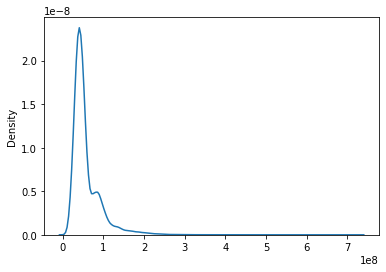

In [38]:
sns.distplot(x= info['Total UL (Bytes)'], hist=False)

<AxesSubplot:ylabel='Density'>

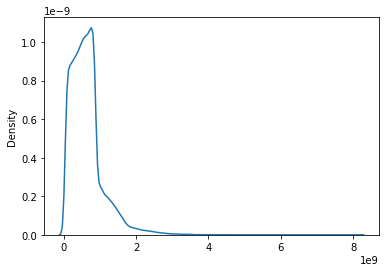

In [39]:
sns.distplot(x= info['Total DL (Bytes)'], hist=False)

<AxesSubplot:ylabel='Density'>

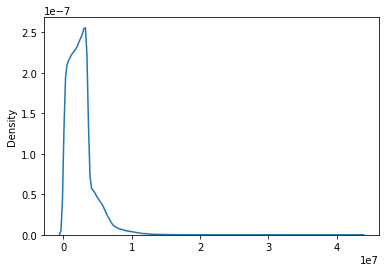

In [40]:
sns.distplot(x= data_volumes['Social media data vol'], hist=False)

<AxesSubplot:ylabel='Density'>

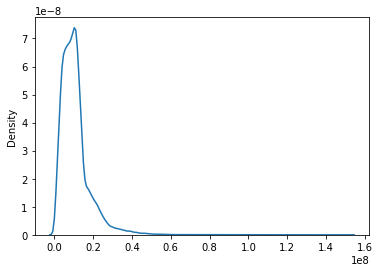

In [41]:
sns.distplot(x= data_volumes['Google data vol'], hist=False)

<AxesSubplot:ylabel='Density'>

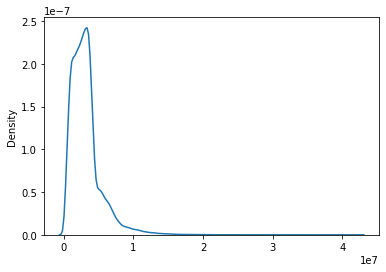

In [42]:
sns.distplot(x= data_volumes['email data vol'], hist=False)

<AxesSubplot:ylabel='Density'>

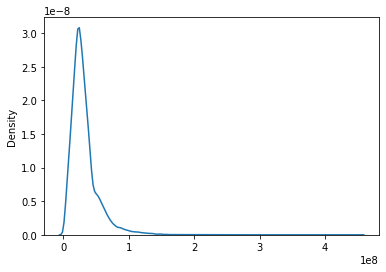

In [43]:
sns.distplot(x= data_volumes['Youtube data vol'], hist=False)

<AxesSubplot:ylabel='Density'>

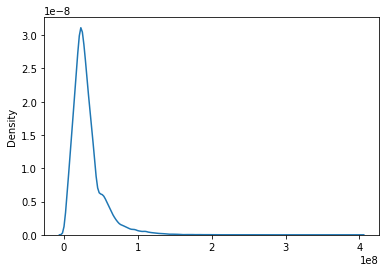

In [44]:
sns.distplot(x= data_volumes['Netflix data vol'], hist=False)

<AxesSubplot:ylabel='Density'>

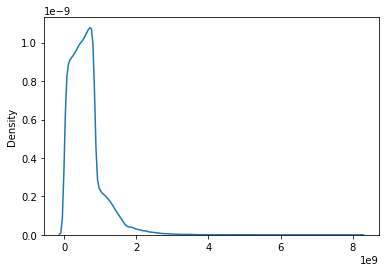

In [45]:
sns.distplot(x= data_volumes['Other_apps data vol'], hist=False)

### Bivariate analysis
Comparison of each application data volume against Total data volume

In [46]:
data_volumes['Total UL+DL (Bytes)']= data_volumes['Total UL (Bytes)']+ data_volumes['Total DL (Bytes)']
data_volumes.head()

,IMSI,Bearer Id,Dur. (ms),Total UL (Bytes),Total DL (Bytes),Social media data vol,Google data vol,email data vol,Youtube data vol,Netflix data vol,Gaming data vol,Other_apps data vol,Total UL+DL (Bytes)
0,2.040471e+14,1,869844.0,60456049.0,78697597.0,1546088.0,9218647.0,3330974.0,40940710.0,28846230.0,43070260.0,4.013605e+08,1.391536e+08
1,2.040808e+14,1,877385.0,37295915.0,194828056.0,715224.0,10438660.0,1520771.0,11959905.0,26592300.0,178048738.0,4.705265e+08,2.321240e+08
2,2.082001e+14,1,86019.0,53794658.0,31376981.0,3122781.0,1624662.0,3657501.0,19882439.0,31830562.0,9124516.0,5.159737e+08,8.517164e+07
3,2.082001e+14,1,86254.0,33583272.0,392918313.0,2577104.0,13811478.0,3855734.0,25657632.0,27785852.0,344105897.0,3.096107e+08,4.265016e+08
4,2.082001e+14,2,573923.0,71325004.0,961767023.0,3426716.0,11665887.0,5564462.0,13840201.0,57343415.0,917684766.0,1.079435e+09,1.033092e+09


Text(0.5, 0, 'Social media data')

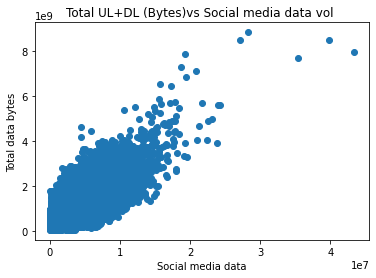

In [47]:
plt.scatter(x= data_volumes['Social media data vol'], y= data_volumes['Total UL+DL (Bytes)'])
plt.title('Total UL+DL (Bytes)vs Social media data vol ')
plt.ylabel('Total data bytes')
plt.xlabel('Social media data')

In [48]:
data_volumes.head()

,IMSI,Bearer Id,Dur. (ms),Total UL (Bytes),Total DL (Bytes),Social media data vol,Google data vol,email data vol,Youtube data vol,Netflix data vol,Gaming data vol,Other_apps data vol,Total UL+DL (Bytes)
0,2.040471e+14,1,869844.0,60456049.0,78697597.0,1546088.0,9218647.0,3330974.0,40940710.0,28846230.0,43070260.0,4.013605e+08,1.391536e+08
1,2.040808e+14,1,877385.0,37295915.0,194828056.0,715224.0,10438660.0,1520771.0,11959905.0,26592300.0,178048738.0,4.705265e+08,2.321240e+08
2,2.082001e+14,1,86019.0,53794658.0,31376981.0,3122781.0,1624662.0,3657501.0,19882439.0,31830562.0,9124516.0,5.159737e+08,8.517164e+07
3,2.082001e+14,1,86254.0,33583272.0,392918313.0,2577104.0,13811478.0,3855734.0,25657632.0,27785852.0,344105897.0,3.096107e+08,4.265016e+08
4,2.082001e+14,2,573923.0,71325004.0,961767023.0,3426716.0,11665887.0,5564462.0,13840201.0,57343415.0,917684766.0,1.079435e+09,1.033092e+09


Text(0.5, 0, 'Google data')

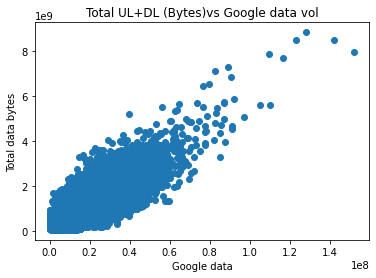

In [49]:
plt.scatter(x= data_volumes['Google data vol'], y= data_volumes['Total UL+DL (Bytes)'])
plt.title('Total UL+DL (Bytes)vs Google data vol')
plt.ylabel('Total data bytes')
plt.xlabel('Google data')

Text(0.5, 0, 'email data')

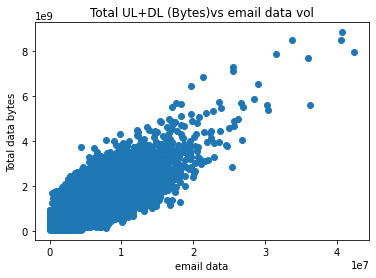

In [50]:
plt.scatter(x= data_volumes['email data vol'], y= data_volumes['Total UL+DL (Bytes)'])
plt.title('Total UL+DL (Bytes)vs email data vol')
plt.ylabel('Total data bytes')
plt.xlabel('email data')

Text(0.5, 0, 'Youtube data')

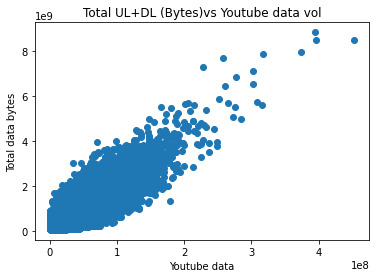

In [51]:
plt.scatter(x= data_volumes['Youtube data vol'], y= data_volumes['Total UL+DL (Bytes)'])
plt.title('Total UL+DL (Bytes)vs Youtube data vol')
plt.ylabel('Total data bytes')
plt.xlabel('Youtube data')

Text(0.5, 0, 'Netflix data')

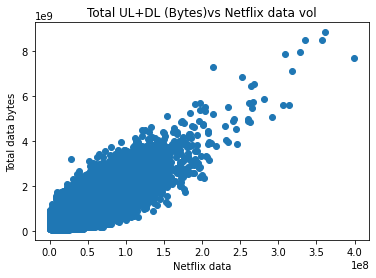

In [52]:
plt.scatter(x= data_volumes['Netflix data vol'], y= data_volumes['Total UL+DL (Bytes)'])
plt.title('Total UL+DL (Bytes)vs Netflix data vol')
plt.ylabel('Total data bytes')
plt.xlabel('Netflix data')

Text(0.5, 0, 'Gaming data')

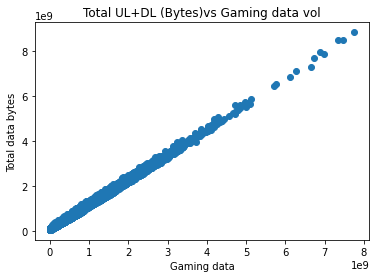

In [53]:
plt.scatter(x= data_volumes['Gaming data vol'], y= data_volumes['Total UL+DL (Bytes)'])
plt.title('Total UL+DL (Bytes)vs Gaming data vol')
plt.ylabel('Total data bytes')
plt.xlabel('Gaming data')

Text(0.5, 0, 'Other_apps data')

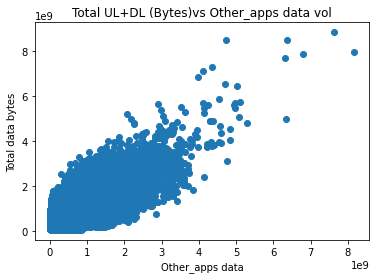

In [54]:
plt.scatter(x= data_volumes['Other_apps data vol'], y= data_volumes['Total UL+DL (Bytes)'])
plt.title('Total UL+DL (Bytes)vs Other_apps data vol')
plt.ylabel('Total data bytes')
plt.xlabel('Other_apps data')

In [55]:
data_volumes.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['IMSI', 'Bearer Id', 'Dur. (ms)', 'Total UL (Bytes)',
       'Total DL (Bytes)', 'Social media data vol', 'Google data vol',
       'email data vol', 'Youtube data vol', 'Netflix data vol',
       'Gaming data vol', 'Other_apps data vol', 'Total UL+DL (Bytes)'],
      dtype='object')>

### Variable transformations
segmenting the users into top five decile classes based on the total duration for all sessions and compute the total data (DL+UL) per decile class. 


In [56]:
# segmenting the users into top five decile classes based on the total duration for all sessions
data_volumes['Segments']= pd.qcut(data_volumes['Dur. (ms)'], q=5, labels= ['class 1', 'class 2', 'class 3', 'class 4', 'classs 5'])
data_volumes.head()

,IMSI,Bearer Id,Dur. (ms),Total UL (Bytes),Total DL (Bytes),Social media data vol,Google data vol,email data vol,Youtube data vol,Netflix data vol,Gaming data vol,Other_apps data vol,Total UL+DL (Bytes),Segments
0,2.040471e+14,1,869844.0,60456049.0,78697597.0,1546088.0,9218647.0,3330974.0,40940710.0,28846230.0,43070260.0,4.013605e+08,1.391536e+08,classs 5
1,2.040808e+14,1,877385.0,37295915.0,194828056.0,715224.0,10438660.0,1520771.0,11959905.0,26592300.0,178048738.0,4.705265e+08,2.321240e+08,classs 5
2,2.082001e+14,1,86019.0,53794658.0,31376981.0,3122781.0,1624662.0,3657501.0,19882439.0,31830562.0,9124516.0,5.159737e+08,8.517164e+07,class 2
3,2.082001e+14,1,86254.0,33583272.0,392918313.0,2577104.0,13811478.0,3855734.0,25657632.0,27785852.0,344105897.0,3.096107e+08,4.265016e+08,class 2
4,2.082001e+14,2,573923.0,71325004.0,961767023.0,3426716.0,11665887.0,5564462.0,13840201.0,57343415.0,917684766.0,1.079435e+09,1.033092e+09,classs 5


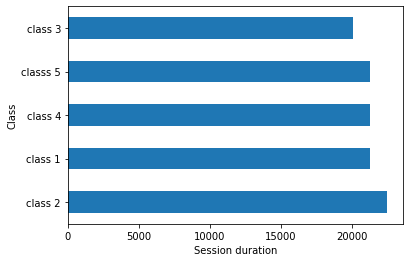

In [57]:
#Visualization
data_volumes['Segments'].value_counts().plot(kind='barh')
plt.xlabel('Session duration')
plt.ylabel('Class')
plt.show()

In [58]:
# computing the total data (DL+UL) per decile class
dataPer_segment= data_volumes.groupby(pd.qcut(data_volumes['Dur. (ms)'], q=5, labels= ['class 1', 'class 2', 'class 3', 'class 4', 'classs 5']))['Total UL+DL (Bytes)'].sum()
dataPer_segment

Dur. (ms)
class 1     1.152440e+13
class 2     1.233818e+13
class 3     1.167412e+13
class 4     1.391849e+13
classs 5    2.409768e+13
Name: Total UL+DL (Bytes), dtype: float64

### Correlation Analysis
compute a correlation matrix for the following variables and interpret your findings: Social Media data, Google data, Email data, Youtube data, Netflix data, Gaming data, Other data 

In [59]:
corr = data_volumes.corr()
corr=corr.drop(columns = ['IMSI', 'Bearer Id', 'Dur. (ms)', 'Total DL (Bytes)', 'Total UL (Bytes)', 'Total UL+DL (Bytes)'], axis=0)
corr=corr.drop(['IMSI', 'Bearer Id', 'Dur. (ms)', 'Total DL (Bytes)', 'Total UL (Bytes)', 'Total UL+DL (Bytes)'])
corr

,Social media data vol,Google data vol,email data vol,Youtube data vol,Netflix data vol,Gaming data vol,Other_apps data vol
Social media data vol,1.000000,0.643289,0.634276,0.659589,0.660080,0.590574,0.591662
Google data vol,0.643289,1.000000,0.688695,0.718857,0.716468,0.642482,0.642987
email data vol,0.634276,0.688695,1.000000,0.704919,0.705730,0.627854,0.631347
Youtube data vol,0.659589,0.718857,0.704919,1.000000,0.738643,0.657713,0.660620
Netflix data vol,0.660080,0.716468,0.705730,0.738643,1.000000,0.657634,0.656074
Gaming data vol,0.590574,0.642482,0.627854,0.657713,0.657634,1.000000,0.586691
Other_apps data vol,0.591662,0.642987,0.631347,0.660620,0.656074,0.586691,1.000000


In [60]:
len(corr.columns)

7

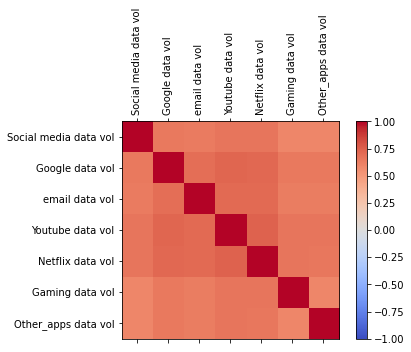

In [61]:
#Visualizing the correlation using a correlation matrix plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(corr.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)
plt.show()

### Dimensionality Reduction


## 2.  User Engagement analysis

In [ ]:
# Aggregate the sessions frequency ,the duration of the session ,the sessions total traffic (download and upload (bytes))


In [62]:
df_dropped.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,42.0,5.0,23.0,44.0,21030583.0,771882.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,116286820.0,3291067.0,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,999.0,344.0,820.0,150.0,976.0,142.0,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,21030583.0,771882.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,116286820.0,3291067.0,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),999.0,344.0,820.0,150.0,976.0,142.0,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,105.0,17.0,6.0,9.0,21030583.0,771882.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,116286820.0,3291067.0,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),999.0,344.0,820.0,150.0,976.0,142.0,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,105.0,17.0,44.0,44.0,21030583.0,771882.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,116286820.0,3291067.0,3330.0,37882.0,1.321510e+09,undefined,undefined,999.0,344.0,820.0,150.0,976.0,142.0,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,105.0,17.0,6.0,9.0,21030583.0,771882.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,116286820.0,3291067.0,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,999.0,344.0,820.0,150.0,976.0,142.0,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [63]:
df_dropped.isna().sum()

Bearer Id                                   0
Start                                       0
Start ms                                    0
End                                         0
End ms                                      0
Dur. (ms)                                   0
IMSI                                        0
MSISDN/Number                               0
IMEI                                        0
Last Location Name                          0
Avg RTT DL (ms)                             0
Avg RTT UL (ms)                             0
Avg Bearer TP DL (kbps)                     0
Avg Bearer TP UL (kbps)                     0
TCP DL Retrans. Vol (Bytes)                 0
TCP UL Retrans. Vol (Bytes)                 0
DL TP < 50 Kbps (%)                         0
50 Kbps < DL TP < 250 Kbps (%)              0
250 Kbps < DL TP < 1 Mbps (%)               0
DL TP > 1 Mbps (%)                          0
UL TP < 10 Kbps (%)                         0
10 Kbps < UL TP < 50 Kbps (%)     

In [64]:
df_dropped.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb 

In [65]:
engagement = df_dropped.groupby('MSISDN/Number').aggregate({'Bearer Id': 'count', 
                                                            'Dur. (ms)': 'sum',
                                                            'Total UL (Bytes)':'sum',
                                                            'Total DL (Bytes)' :'sum'
                                                           }).reset_index()

In [66]:
engagement.head()

,MSISDN/Number,Bearer Id,Dur. (ms),Total UL (Bytes),Total DL (Bytes)
0,3.360100e+10,1,116720.0,36053108.0,8.426375e+08
1,3.360100e+10,1,181230.0,36104459.0,1.207552e+08
2,3.360100e+10,1,134969.0,39306820.0,5.566597e+08
3,3.360101e+10,1,49878.0,20327526.0,4.019932e+08
4,3.360101e+10,2,37104.0,94280527.0,1.363130e+09


In [67]:
engagement['Total traffic (Bytes)']= engagement['Total UL (Bytes)']+ engagement['Total DL (Bytes)']
engagement.head()

,MSISDN/Number,Bearer Id,Dur. (ms),Total UL (Bytes),Total DL (Bytes),Total traffic (Bytes)
0,3.360100e+10,1,116720.0,36053108.0,8.426375e+08,8.786906e+08
1,3.360100e+10,1,181230.0,36104459.0,1.207552e+08,1.568596e+08
2,3.360100e+10,1,134969.0,39306820.0,5.566597e+08,5.959665e+08
3,3.360101e+10,1,49878.0,20327526.0,4.019932e+08,4.223207e+08
4,3.360101e+10,2,37104.0,94280527.0,1.363130e+09,1.457411e+09


In [68]:
# report the top 10 customers per engagement metric 
engagement.sort_values(by='Bearer Id')
engagement.head(10)

,MSISDN/Number,Bearer Id,Dur. (ms),Total UL (Bytes),Total DL (Bytes),Total traffic (Bytes)
0,3.360100e+10,1,116720.0,36053108.0,8.426375e+08,8.786906e+08
1,3.360100e+10,1,181230.0,36104459.0,1.207552e+08,1.568596e+08
2,3.360100e+10,1,134969.0,39306820.0,5.566597e+08,5.959665e+08
3,3.360101e+10,1,49878.0,20327526.0,4.019932e+08,4.223207e+08
4,3.360101e+10,2,37104.0,94280527.0,1.363130e+09,1.457411e+09
5,3.360101e+10,2,253983.0,60009249.0,5.552080e+08,6.152172e+08
6,3.360101e+10,2,128360.0,101681858.0,5.530412e+08,6.547231e+08
7,3.360101e+10,1,86399.0,38575279.0,2.940851e+08,3.326604e+08
8,3.360101e+10,2,495702.0,93572016.0,8.965602e+08,9.901322e+08
9,3.360102e+10,1,124854.0,47091008.0,6.853728e+08,7.324638e+08


In [69]:
engagement_parameters= engagement.drop(columns= ['Total UL (Bytes)', 'Total DL (Bytes)'], axis=1 )
engagement_parameters.head()

,MSISDN/Number,Bearer Id,Dur. (ms),Total traffic (Bytes)
0,3.360100e+10,1,116720.0,8.786906e+08
1,3.360100e+10,1,181230.0,1.568596e+08
2,3.360100e+10,1,134969.0,5.959665e+08
3,3.360101e+10,1,49878.0,4.223207e+08
4,3.360101e+10,2,37104.0,1.457411e+09


In [70]:
engagement_parameters.sort_values(by='Dur. (ms)')
engagement_parameters.head(10)

,MSISDN/Number,Bearer Id,Dur. (ms),Total traffic (Bytes)
0,3.360100e+10,1,116720.0,8.786906e+08
1,3.360100e+10,1,181230.0,1.568596e+08
2,3.360100e+10,1,134969.0,5.959665e+08
3,3.360101e+10,1,49878.0,4.223207e+08
4,3.360101e+10,2,37104.0,1.457411e+09
5,3.360101e+10,2,253983.0,6.152172e+08
6,3.360101e+10,2,128360.0,6.547231e+08
7,3.360101e+10,1,86399.0,3.326604e+08
8,3.360101e+10,2,495702.0,9.901322e+08
9,3.360102e+10,1,124854.0,7.324638e+08


In [71]:
engagement_parameters.sort_values(by='Total traffic (Bytes)')
engagement_parameters.tail(10)

,MSISDN/Number,Bearer Id,Dur. (ms),Total traffic (Bytes)
106342,3.378995e+10,2,209051.0,1.540055e+09
106343,3.378996e+10,1,98826.0,6.457777e+08
106344,3.378996e+10,1,157069.0,7.102876e+08
106345,3.378997e+10,1,160461.0,2.081231e+08
106346,3.378998e+10,2,210389.0,1.094693e+09
106347,3.379000e+10,1,8810.0,7.146416e+08
106348,3.379000e+10,1,140988.0,4.803073e+08
106349,3.197021e+12,1,877385.0,2.321240e+08
106350,3.370000e+14,1,253030.0,5.962878e+08
106351,8.823971e+14,1,869844.0,1.391536e+08


In [72]:
#Normalize each engagement metric
def data_normalizer(df,columns):
    for col in columns:
        df[col]= MinMaxScaler().fit_transform(np.array(df[col]).reshape(-1,1))
    return df


In [73]:
normalized_df = data_normalizer(engagement_parameters, ['Total traffic (Bytes)','Dur. (ms)', 'Bearer Id'])

In [74]:
normalized_df.head()

,MSISDN/Number,Bearer Id,Dur. (ms),Total traffic (Bytes)
0,3.360100e+10,0.000000,0.005908,0.095931
1,3.360100e+10,0.000000,0.009387,0.014026
2,3.360100e+10,0.000000,0.006892,0.063851
3,3.360101e+10,0.000000,0.002304,0.044148
4,3.360101e+10,0.058824,0.001615,0.161598


In [75]:
 # k-means (k=3) to classify customers in three groups of engagement.

kmeans = KMeans(n_clusters=3, random_state=0).fit(normalized_df)
kmeans.labels_


array([0, 0, 0, ..., 0, 2, 1])

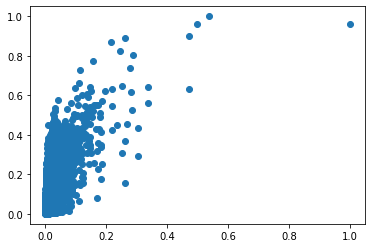

In [76]:
plt.scatter(normalized_df['Dur. (ms)'],normalized_df['Total traffic (Bytes)'])

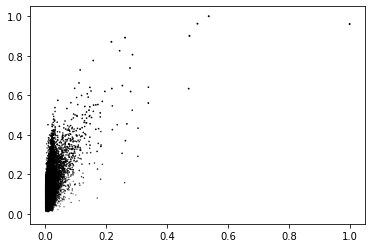

In [77]:
X = normalized_df
#Visualise data points
plt.scatter(X['Dur. (ms)'],X['Total traffic (Bytes)'],X['Bearer Id'],c='black')

plt.show()

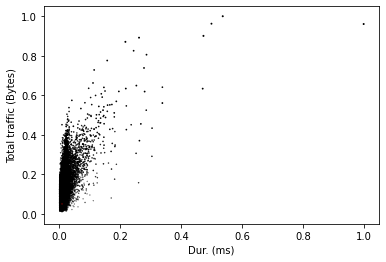

In [78]:
K=3

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X['Dur. (ms)'],X['Total traffic (Bytes)'],X['Bearer Id'],c='black')
plt.scatter(Centroids['Dur. (ms)'],Centroids['Total traffic (Bytes)'],Centroids['Bearer Id'],c='red')
plt.xlabel('Dur. (ms)')
plt.ylabel('Total traffic (Bytes)')

plt.show()

In [79]:
# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c['Dur. (ms)']-row_d['Dur. (ms)'])**2
            d2=(row_c['Total traffic (Bytes)']-row_d['Total traffic (Bytes)'])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[['Total traffic (Bytes)','Dur. (ms)']]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['Total traffic (Bytes)'] - Centroids['Total traffic (Bytes)']).sum() + (Centroids_new['Dur. (ms)'] - Centroids['Dur. (ms)']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[['Total traffic (Bytes)','Dur. (ms)']]

0.02498402734179977
0.026805486830922973
0.036202875069050774
0.027809714583483372
0.01807407646158576
0.012355378715301776
0.008426549702182918
0.005926700069462446
0.0043615325311313615
0.0032402998714296345
0.0024143272479312996
0.0016710096381721239
0.0012120185073358023
0.0008820984171076345
0.000671656974255805
0.0005246646341949416
0.0004487357002674495
0.00034080617675581563
0.00027169556735457973
0.00013497702235371837
0.00012894135159084545
0.00010190894578828921
8.466787304405986e-05
8.96987357126202e-05
7.867028414002344e-05
0.00010835687942722591
3.15643081766721e-05
2.1361934554652538e-05
4.234885339278894e-05
4.9445426972381454e-05
3.6496789165592694e-05
1.9966860527966326e-05
1.9376770210479365e-05
7.67668546248091e-06
2.1970584886388082e-05
1.6803627538896845e-05
2.748853143103719e-05
1.93802733745186e-05
1.6409462663471985e-05
1.2013338553948719e-06
0.0


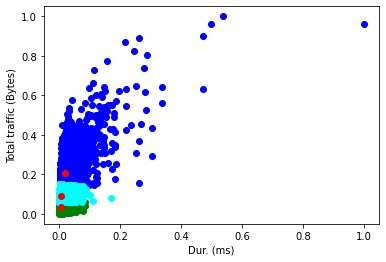

In [82]:
color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data['Dur. (ms)'],data['Total traffic (Bytes)'],c=color[k])
plt.scatter(Centroids['Dur. (ms)'],Centroids['Total traffic (Bytes)'],c='red')
plt.xlabel('Dur. (ms)')
plt.ylabel('Total traffic (Bytes)')
plt.show()

In [83]:
#Compute the minimum, maximum, average & total non- normalized metrics for each cluster. Interpret your results visually with accompanying text explaining your findings.
data.describe()

,MSISDN/Number,Bearer Id,Dur. (ms),Total traffic (Bytes),1,2,3,Cluster
count,4.743200e+04,47432.000000,4.743200e+04,47432.000000,47432.000000,47432.000000,47432.000000,47432.0
mean,4.077802e+10,0.023170,7.136778e-03,0.090641,0.116701,0.056655,0.017339,3.0
std,1.547216e+12,0.034034,6.096926e-03,0.020622,0.020592,0.020704,0.012719,0.0
min,3.360100e+10,0.000000,2.156728e-07,0.061263,0.058301,0.028185,0.000049,3.0
25%,3.365080e+10,0.000000,3.674135e-03,0.074838,0.108521,0.040819,0.007413,3.0
50%,3.366360e+10,0.000000,5.454770e-03,0.087005,0.120354,0.052938,0.014365,3.0
75%,3.368322e+10,0.058824,9.022834e-03,0.098886,0.132475,0.064839,0.023896,3.0
max,3.370000e+14,0.294118,1.707957e-01,0.149852,0.196332,0.171656,0.163970,3.0


### User total traffic per application

In [84]:
df_dropped.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb 

In [85]:
application_volumes=df_dropped.groupby('MSISDN/Number').aggregate({'Social Media DL (Bytes)':'sum',
                                                            'Social Media UL (Bytes)':'sum',
                                                            'Google DL (Bytes)':'sum',
                                                            'Google UL (Bytes)':'sum',
                                                            'Email DL (Bytes)':'sum',
                                                            'Email UL (Bytes)':'sum',
                                                            'Youtube DL (Bytes)':'sum',
                                                            'Youtube UL (Bytes)':'sum',
                                                            'Netflix DL (Bytes)':'sum',
                                                            'Netflix UL (Bytes)':'sum',
                                                            'Gaming DL (Bytes)':'sum',
                                                            'Gaming UL (Bytes)':'sum',
                                                            'Other DL (Bytes)':'sum',
                                                            'Other UL (Bytes)':'sum'
                                                            }).reset_index()

In [86]:
#creating a dict with columns to be combined
columns = {'Social media data vol':['Social Media DL (Bytes)','Social Media UL (Bytes)'],
           'Google data vol':['Google DL (Bytes)', 'Google UL (Bytes)'],
           'email data vol':['Email DL (Bytes)', 'Email UL (Bytes)'],
           'Youtube data vol':['Youtube DL (Bytes)', 'Youtube UL (Bytes)'],
           'Netflix data vol':['Netflix DL (Bytes)', 'Netflix UL (Bytes)'],
           'Gaming data vol':['Gaming DL (Bytes)', 'Gaming UL (Bytes)'],
           'Other_apps data vol':['Other DL (Bytes)', 'Other UL (Bytes)']
          }
application_volumes= combine_columns(columns,application_volumes)
application_volumes.head()

,MSISDN/Number,Social media data vol,Google data vol,email data vol,Youtube data vol,Netflix data vol,Gaming data vol,Other_apps data vol
0,3.360100e+10,2232135.0,4389005.0,1331362.0,21624548.0,27180981.0,8.124587e+08,386570872.0
1,3.360100e+10,2660565.0,5334863.0,3307781.0,12432223.0,11221763.0,1.197501e+08,281710071.0
2,3.360100e+10,3195623.0,3443126.0,3205380.0,21333570.0,19353900.0,5.388277e+08,501693672.0
3,3.360101e+10,280294.0,9678493.0,2284670.0,6977321.0,1942092.0,3.911261e+08,35279702.0
4,3.360101e+10,2912542.0,18499616.0,3305469.0,41533002.0,49201724.0,1.314798e+09,804804484.0


In [87]:
application_volumes.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['MSISDN/Number', 'Social media data vol', 'Google data vol',
       'email data vol', 'Youtube data vol', 'Netflix data vol',
       'Gaming data vol', 'Other_apps data vol'],
      dtype='object')>

In [88]:
# top 10 most engaged users per application
social_media_top= application_volumes.sort_values(by='Social media data vol')
social_media_top= social_media_top.drop(columns=['Google data vol','email data vol', 'Youtube data vol','Netflix data vol','Gaming data vol', 'Other_apps data vol'],axis=1)
social_media_top.head(10)

,MSISDN/Number,Social media data vol
42994,3.366119e+10,1563.0
37369,3.365984e+10,2003.0
68196,3.366825e+10,4469.0
92365,3.376049e+10,7382.0
96854,3.376220e+10,7503.0
89324,3.369980e+10,7852.0
4245,3.361152e+10,8261.0
105653,3.378638e+10,9452.0
7632,3.361687e+10,9804.0
16804,3.363275e+10,9931.0


In [89]:
application_volumes.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['MSISDN/Number', 'Social media data vol', 'Google data vol',
       'email data vol', 'Youtube data vol', 'Netflix data vol',
       'Gaming data vol', 'Other_apps data vol'],
      dtype='object')>

In [90]:
Google_data_top= application_volumes.sort_values(by='Google data vol')
Google_data_top= Google_data_top.drop(columns=['Social media data vol','email data vol', 'Youtube data vol','Netflix data vol','Gaming data vol', 'Other_apps data vol'], axis=1)
Google_data_top.head(10)

,MSISDN/Number,Google data vol
81636,3.368727e+10,40330.0
83663,3.369800e+10,89856.0
75061,3.367409e+10,99826.0
71975,3.366953e+10,112590.0
94318,3.376132e+10,112674.0
19727,3.364205e+10,118142.0
3680,3.361058e+10,119556.0
48442,3.366247e+10,125751.0
51147,3.366312e+10,129518.0
78014,3.367994e+10,131108.0


In [91]:
email_data_top= application_volumes.sort_values(by='email data vol')
email_data_top= email_data_top.drop(columns=['Social media data vol','Google data vol', 'Youtube data vol','Netflix data vol','Gaming data vol', 'Other_apps data vol'], axis=1)
email_data_top.head(10)

,MSISDN/Number,email data vol
27251,3.365114e+10,18176.0
28048,3.365204e+10,26087.0
20613,3.364479e+10,26116.0
76012,3.367590e+10,27503.0
57718,3.366490e+10,29451.0
996,3.360371e+10,32453.0
36608,3.365967e+10,32764.0
53137,3.366364e+10,33656.0
49618,3.366275e+10,33796.0
15619,3.363013e+10,33867.0


In [92]:
Youtube_data_top= application_volumes.sort_values(by='Youtube data vol')
Youtube_data_top= Youtube_data_top.drop(columns=['Social media data vol','Google data vol', 'email data vol','Netflix data vol','Gaming data vol', 'Other_apps data vol'], axis=1)
Youtube_data_top.head(10)

,MSISDN/Number,Youtube data vol
29639,3.365817e+10,78903.0
71880,3.366949e+10,157446.0
22036,3.364809e+10,207955.0
101065,3.376848e+10,226562.0
89015,3.369970e+10,239357.0
37620,3.365990e+10,269614.0
9377,3.361979e+10,329617.0
4885,3.361250e+10,350699.0
34292,3.365915e+10,366436.0
20460,3.364403e+10,381231.0


In [93]:
Netflix_data_top= application_volumes.sort_values(by='Netflix data vol')
Netflix_data_top= Netflix_data_top.drop(columns=['Social media data vol','Google data vol', 'email data vol','Youtube data vol','Gaming data vol', 'Other_apps data vol'], axis=1)
Netflix_data_top.head(10)

,MSISDN/Number,Netflix data vol
76869,3.367759e+10,184569.0
7023,3.361588e+10,201564.0
65824,3.366749e+10,248628.0
85209,3.369853e+10,260252.0
85065,3.369849e+10,284133.0
98967,3.376335e+10,320483.0
40430,3.366057e+10,334842.0
48939,3.366258e+10,354670.0
98954,3.376335e+10,359190.0
8000,3.361754e+10,364496.0


In [94]:
Gaming_data_top= application_volumes.sort_values(by='Gaming data vol')
Gaming_data_top= Gaming_data_top.drop(columns=['Social media data vol','Google data vol', 'email data vol','Youtube data vol','Netflix data vol', 'Other_apps data vol'], axis=1)
Gaming_data_top.head(10)

,MSISDN/Number,Gaming data vol
71529,3.366936e+10,306358.0
79207,3.368231e+10,595375.0
101709,3.376960e+10,690038.0
83867,3.369808e+10,939116.0
83816,3.369806e+10,1180903.0
8313,3.361806e+10,1228856.0
95463,3.376167e+10,1367927.0
28893,3.365803e+10,1645468.0
68137,3.366823e+10,1713528.0
63372,3.366668e+10,1980834.0


In [95]:
OtherApps_data_top= application_volumes.sort_values(by='Other_apps data vol')
OtherApps_data_top= OtherApps_data_top.drop(columns=['Social media data vol','Google data vol', 'email data vol','Youtube data vol','Netflix data vol','Gaming data vol' ], axis=1)
OtherApps_data_top.head(10)

,MSISDN/Number,Other_apps data vol
95573,3.376170e+10,149045.0
95120,3.376159e+10,972727.0
13256,3.362603e+10,1127863.0
52743,3.366354e+10,1130046.0
39609,3.366037e+10,1368322.0
79012,3.368193e+10,1448279.0
44227,3.366150e+10,1514672.0
79536,3.368297e+10,1581970.0
1043,3.360378e+10,1805767.0
103906,3.378195e+10,2000242.0


### Top 3 most used applications

In [96]:
sum_1= application_volumes.sum(axis=0)
sum_1.sort_values(axis=0, ascending=False)



MSISDN/Number            4.803809e+15
Gaming data vol          6.384655e+13
Other_apps data vol      6.370400e+13
Youtube data vol         3.359002e+12
Netflix data vol         3.356973e+12
Google data vol          1.158267e+12
email data vol           3.351293e+11
Social media data vol    2.711855e+11
dtype: float64

In [97]:
Top3_User_apps= application_volumes.sort_values(by='MSISDN/Number')
Top3_User_apps= Top3_User_apps.drop(columns=['Social media data vol','Google data vol', 'email data vol','Netflix data vol' ], axis=1)
Top3_User_apps.head(10)

,MSISDN/Number,Youtube data vol,Gaming data vol,Other_apps data vol
0,3.360100e+10,21624548.0,8.124587e+08,3.865709e+08
1,3.360100e+10,12432223.0,1.197501e+08,2.817101e+08
2,3.360100e+10,21333570.0,5.388277e+08,5.016937e+08
3,3.360101e+10,6977321.0,3.911261e+08,3.527970e+07
4,3.360101e+10,41533002.0,1.314798e+09,8.048045e+08
5,3.360101e+10,34347122.0,5.116358e+08,4.923728e+08
6,3.360101e+10,26431335.0,5.484611e+08,2.248887e+08
7,3.360101e+10,18892740.0,2.823644e+08,1.782015e+08
8,3.360101e+10,63443802.0,8.330880e+08,1.041883e+09
9,3.360102e+10,28569712.0,6.470957e+08,1.383392e+08


<AxesSubplot:ylabel='Density'>

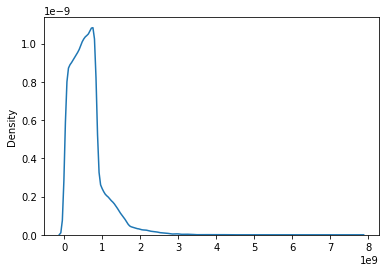

In [98]:
sns.distplot(x= Top3_User_apps['Gaming data vol'], hist=False)

<AxesSubplot:ylabel='Density'>

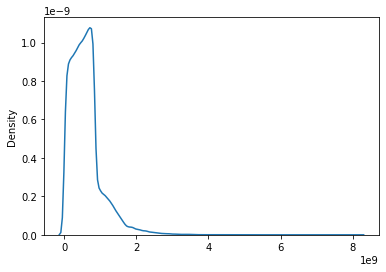

In [99]:
sns.distplot(x= Top3_User_apps['Other_apps data vol'], hist=False)

<AxesSubplot:ylabel='Density'>

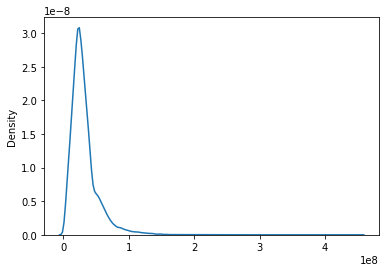

In [100]:
sns.distplot(x= Top3_User_apps['Youtube data vol'], hist=False)

In [101]:
X =Top3_User_apps

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

In [102]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 23006374427.15898
2 : 6455435323.106554
3 : 528997380.1055621
4 : 497792089.8596015
5 : 396531950.706104
6 : 342058601.28987813
7 : 304987918.9277691
8 : 261391646.66535664
9 : 237854819.68003747


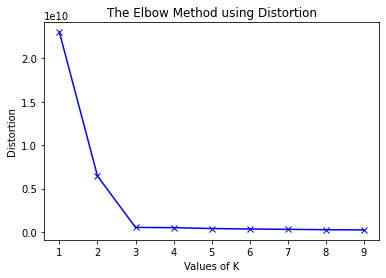

In [103]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [104]:
for key, val in mapping2.items():
    print(f'{key} : {val}')

1 : 8.921075575869025e+29
2 : 1.1355529186629357e+29
3 : 1.0049891344298365e+25
4 : 4.322288008449758e+22
5 : 2.290306382166192e+22
6 : 1.715645849548889e+22
7 : 1.3594788477411581e+22
8 : 1.1037998359896396e+22
9 : 9.427004607843341e+21


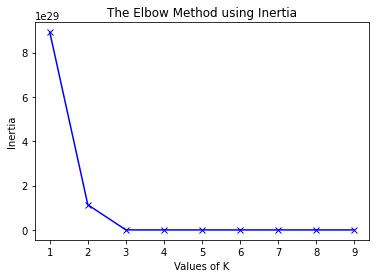

In [105]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [106]:

kmeans = KMeans(n_clusters=3, random_state=0).fit(Top3_User_apps)
kmeans.labels_







array([0, 0, 0, ..., 0, 2, 1])

In [107]:
X, _ = make_blobs(n_samples=10, centers=3, n_features=3)



kmeans = KMeans(n_clusters=3)

y = kmeans.fit_predict(Top3_User_apps[['Gaming data vol','Other_apps data vol','Youtube data vol']])

Top3_User_apps['Cluster'] = y

Top3_User_apps.head()

,MSISDN/Number,Youtube data vol,Gaming data vol,Other_apps data vol,Cluster
0,3.360100e+10,21624548.0,8.124587e+08,386570872.0,0
1,3.360100e+10,12432223.0,1.197501e+08,281710071.0,0
2,3.360100e+10,21333570.0,5.388277e+08,501693672.0,0
3,3.360101e+10,6977321.0,3.911261e+08,35279702.0,0
4,3.360101e+10,41533002.0,1.314798e+09,804804484.0,1


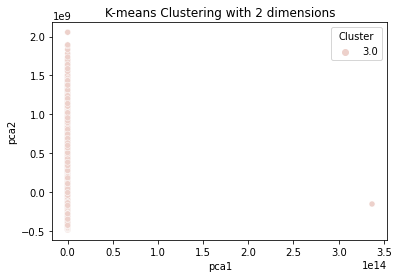

In [108]:
### Run PCA on the data and reduce the dimensions in pca_num_components dimensions

pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(Top3_User_apps)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=data['Cluster'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

In [ ]:
K=3
#,X['Youtube data vol']

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X['Gaming data vol'],X['Other_apps data vol'],c='black')
plt.scatter(Centroids['Gaming data vol'],Centroids['Other_apps data vol'],Centroids['Youtube data vol'],c='red')
plt.xlabel('Gaming data vol')
plt.ylabel('Other_apps data vol')

plt.show()

In [ ]:
# Optimal number of clusters is k=3
color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(Top3_User_apps['Gaming data vol'],Top3_User_apps['Other_apps data vol'],Top3_User_apps['Youtube data vol'],c=color[k])
plt.scatter(Centroids['Dur. (ms)'],Centroids['Total traffic (Bytes)'],c='red')
plt.xlabel('Dur. (ms)')
plt.ylabel('Total traffic (Bytes)')
plt.show()

## 3.  Experience Analytics


In [105]:
df_dropped.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb 

In [112]:
df_dropped.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,42.0,5.0,23.0,44.0,21030583.0,771882.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,116286820.0,3291067.0,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,999.0,344.0,820.0,150.0,976.0,142.0,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,21030583.0,771882.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,116286820.0,3291067.0,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),999.0,344.0,820.0,150.0,976.0,142.0,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,105.0,17.0,6.0,9.0,21030583.0,771882.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,116286820.0,3291067.0,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),999.0,344.0,820.0,150.0,976.0,142.0,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,105.0,17.0,44.0,44.0,21030583.0,771882.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,116286820.0,3291067.0,3330.0,37882.0,1.321510e+09,undefined,undefined,999.0,344.0,820.0,150.0,976.0,142.0,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,105.0,17.0,6.0,9.0,21030583.0,771882.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,116286820.0,3291067.0,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,999.0,344.0,820.0,150.0,976.0,142.0,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [20]:
exp_df= df_dropped.groupby('MSISDN/Number').aggregate({'TCP DL Retrans. Vol (Bytes)': 'sum', 
                                                            'TCP UL Retrans. Vol (Bytes)': 'sum',
                                                            'Avg RTT UL (ms)':'sum',
                                                            'Avg RTT DL (ms)' :'sum',
                                                            'Avg Bearer TP DL (kbps)':'sum',
                                                            'Avg Bearer TP UL (kbps)':'sum',
                                                            'Handset Type':'sum'
                                                             }).reset_index()

In [21]:
exp_df.head()

,MSISDN/Number,TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Avg RTT UL (ms),Avg RTT DL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),Handset Type
0,3.360100e+10,21030583.0,771882.0,0.0,46.0,37.0,39.0,Huawei P20 Lite Huawei Nova 3E
1,3.360100e+10,21030583.0,771882.0,1.0,30.0,48.0,51.0,Apple iPhone 7 (A1778)
2,3.360100e+10,21030583.0,771882.0,17.0,105.0,48.0,49.0,undefined
3,3.360101e+10,1066.0,771882.0,15.0,69.0,204.0,44.0,Apple iPhone 5S (A1457)
4,3.360101e+10,30380213.0,793084.0,5.0,114.0,40395.0,16449.0,Apple iPhone Se (A1723)Apple iPhone Se (A1723)


### Dataframe with user experience data

In [24]:
#creating a dict with columns to be combined
columns = {'Average TCP retransmission':['TCP DL Retrans. Vol (Bytes)','TCP UL Retrans. Vol (Bytes)'],
           'Average RTT':['Avg RTT UL (ms)', 'Avg RTT DL (ms)'],
           'Average throughput':['Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']
          }
experience_df= combine_columns(columns,exp_df)
experience_df.head()

,MSISDN/Number,Handset Type,Average TCP retransmission,Average RTT,Average throughput
0,3.360100e+10,Huawei P20 Lite Huawei Nova 3E,21802465.0,46.0,76.0
1,3.360100e+10,Apple iPhone 7 (A1778),21802465.0,31.0,99.0
2,3.360100e+10,undefined,21802465.0,122.0,97.0
3,3.360101e+10,Apple iPhone 5S (A1457),772948.0,84.0,248.0
4,3.360101e+10,Apple iPhone Se (A1723)Apple iPhone Se (A1723),31173297.0,119.0,56844.0


In [25]:
experience_df.columns.tolist()

['MSISDN/Number',
 'Handset Type',
 'Average TCP retransmission',
 'Average RTT',
 'Average throughput']

In [26]:
experience_df[['Average TCP retransmission', 'Average RTT', 'Average throughput']].describe()

,Average TCP retransmission,Average RTT,Average throughput
count,1.063520e+05,106352.000000,106352.000000
mean,3.041136e+07,171.980151,21009.259346
std,1.537330e+08,661.167041,42500.194763
min,9.700000e+01,0.000000,0.000000
25%,7.517235e+06,47.000000,97.000000
50%,2.180246e+07,94.000000,290.000000
75%,2.181621e+07,139.000000,26530.500000
max,8.354209e+09,96924.000000,902222.000000


#### TCP RETRANSMISSION VALUES

In [27]:
TCP_retransmission_rankings= experience_df.sort_values(by='Average TCP retransmission')
TCP_retransmission_rankings= TCP_retransmission_rankings.drop(columns=['Average RTT', 'Average throughput' ], axis=1)


In [28]:
TCP_retransmission_rankings.head(10)

,MSISDN/Number,Handset Type,Average TCP retransmission
23343,3.365013e+10,Apple iPhone 5S (A1457),97.0
6316,3.361478e+10,Huawei Ascend Mate7,128.0
96521,3.376206e+10,Apple iPhone 8 (A1905),129.0
13471,3.362636e+10,Apple iPhone 7 (A1778),134.0
2159,3.360783e+10,Apple iPhone 5C (A1529),143.0
25722,3.365068e+10,Xiaomi Communica. Mi Max3,176.0
101728,3.376964e+10,Apple iPhone 5S (A1457),176.0
105282,3.378420e+10,Apple iPhone Xr (A2108),177.0
77729,3.367937e+10,Samsung Galaxy S6 Plus (Sm-G928),179.0
88975,3.369969e+10,Samsung Galaxy Trend Lite 2 (Sm-G318X),182.0


In [29]:
TCP_retransmission_rankings.tail(10)

,MSISDN/Number,Handset Type,Average TCP retransmission
31796,3.365864e+10,Huawei B528S-23AHuawei B528S-23A,5.165857e+09
99466,3.376357e+10,Huawei B528S-23AHuawei B528S-23A,5.179459e+09
70588,3.366905e+10,Huawei B528S-23AHuawei B528S-23AHuawei B528S-2...,5.196017e+09
51399,3.366318e+10,Huawei B528S-23AHuawei B528S-23AHuawei B528S-2...,5.566929e+09
25633,3.365066e+10,Huawei B528S-23AHuawei B528S-23AHuawei B528S-2...,5.593366e+09
97755,3.376264e+10,Huawei B528S-23AHuawei B528S-23AHuawei B528S-2...,5.879989e+09
94234,3.376128e+10,Huawei B528S-23AHuawei B528S-23A,6.043978e+09
42165,3.366098e+10,Huawei B528S-23AHuawei B528S-23AHuawei B528S-2...,7.374911e+09
33949,3.365908e+10,Huawei B528S-23AHuawei B528S-23AHuawei B528S-23A,7.941860e+09
66553,3.366773e+10,Huawei B528S-23AHuawei B528S-23AHuawei B528S-2...,8.354209e+09


In [30]:
# most frequent TCP retransmission
TCP_retransmission_rankings['Average TCP retransmission'].mode()

0    21802465.0
Name: Average TCP retransmission, dtype: float64

#### RTT  VALUES

In [31]:
RTT_rankings= experience_df.sort_values(by='Average RTT')
RTT_rankings=  RTT_rankings.drop(columns=['Average TCP retransmission', 'Average throughput' ], axis=1)
RTT_rankings.head(10)

,MSISDN/Number,Handset Type,Average RTT
28727,3.365298e+10,Huawei P20 Pro,0.0
44534,3.366158e+10,Huawei Pct-L29,0.0
38876,3.366020e+10,Apple iPhone X (A1901),2.0
82995,3.369505e+10,Huawei P20,4.0
35856,3.365949e+10,Apple iPhone 6S (A1688),5.0
69342,3.366862e+10,Apple iPhone 6S (A1688),6.0
21858,3.364768e+10,Huawei Honor View10,8.0
3857,3.361085e+10,Samsung Galaxy S6 Edge (Sm-G925X),9.0
74091,3.367220e+10,Huawei P20 Lite Huawei Nova 3E,9.0
17768,3.363468e+10,Huawei P20 Lite Huawei Nova 3E,10.0


In [32]:
RTT_rankings.tail(10)

,MSISDN/Number,Handset Type,Average RTT
103842,3.378187e+10,Apple iPhone 6S (A1688),25388.0
73897,3.367182e+10,Samsung Galaxy S6 Edge (Sm-G925X),25715.0
1698,3.360679e+10,Samsung Galaxy S9 Plus (Sm-G965F),26300.0
93403,3.376094e+10,Samsung Galaxy S7 Edge (Sm-G935X),27278.0
69820,3.366879e+10,Huawei B528S-23AHuawei B528S-23A,36304.0
95962,3.376181e+10,Huawei B528S-23AHuawei B528S-23AHuawei B528S-2...,37084.0
85276,3.369855e+10,Huawei B528S-23AHuawei B528S-23A,46021.0
79866,3.368369e+10,Lg Lg-D315,54848.0
41745,3.366087e+10,Apple iPhone 6 (A1586)Apple iPhone 6 (A1586),64670.0
47757,3.366232e+10,Apple iPhone 8 (A1905),96924.0


In [33]:
# most frequent TCP retransmission
RTT_rankings['Average RTT'].mode()

0    122.0
Name: Average RTT, dtype: float64

#### THROUGHPUT  VALUES

In [34]:
Throughput_rankings= experience_df.sort_values(by='Average throughput')
Throughput_rankings= Throughput_rankings.drop(columns=['Average TCP retransmission','Average RTT'  ], axis=1)
Throughput_rankings.head(10)

,MSISDN/Number,Handset Type,Average throughput
3715,3.361064e+10,undefined,0.0
33922,3.365908e+10,Apple iPhone Xs Max (A2101),0.0
17725,3.363462e+10,Samsung Galaxy S7 (Sm-G930X),0.0
22768,3.365000e+10,undefined,0.0
71169,3.366924e+10,Huawei P20 Lite Huawei Nova 3E,0.0
52669,3.366352e+10,Samsung Galaxy S6 (Sm-G920X),0.0
40589,3.366062e+10,Samsung Galaxy S7 Edge (Sm-G935X),0.0
85418,3.369859e+10,undefined,0.0
86516,3.369893e+10,Rim Blackberry 8520,0.0
2582,3.360875e+10,Samsung Galaxy J3 (Sm-J320X),0.0


In [35]:
Throughput_rankings.tail(10)

,MSISDN/Number,Handset Type,Average throughput
60488,3.366566e+10,Huawei B528S-23AHuawei B528S-23A,530353.0
97755,3.376264e+10,Huawei B528S-23AHuawei B528S-23AHuawei B528S-2...,549661.0
29159,3.365808e+10,Huawei B528S-23AHuawei B528S-23AHuawei B528S-2...,550352.0
13068,3.362570e+10,Samsung Galaxy S9 Sm-G960F DsSamsung Galaxy S9...,564179.0
84082,3.369817e+10,undefinedundefinedundefinedundefinedundefinedu...,618797.0
68704,3.366843e+10,Huawei B528S-23AHuawei B528S-23AHuawei B528S-2...,676858.0
72811,3.366995e+10,Huawei B528S-23AHuawei B528S-23AHuawei B528S-2...,690815.0
36074,3.365955e+10,Huawei B528S-23AHuawei B528S-23AHuawei B528S-2...,798342.0
69589,3.366871e+10,Huawei B528S-23AHuawei B528S-23AHuawei B528S-2...,840424.0
97128,3.376233e+10,Samsung Galaxy A8 (2018)Samsung Galaxy A8 (201...,902222.0


In [36]:
# most frequent TCP retransmission
Throughput_rankings['Average throughput'].mode()

0    15.0
Name: Average throughput, dtype: float64

## Removing outliers

In [133]:
# function to calculate interquartile range
def find_iqr(x):
    IQR= np.subtract(*np.percentile(x, [75, 25]))
    return IQR

#calculate IQR for 'Average TCP retransmission', 'Average RTT', 'Average throughput' columns
experience_df[['Average TCP retransmission', 'Average RTT', 'Average throughput']].apply(find_iqr)

Average TCP retransmission    14298978.25
Average RTT                         92.00
Average throughput               26433.50
dtype: float64

In [134]:
experience_df['Average TCP retransmission'].values

array([21802465., 21802465., 21802465., ..., 21802465., 21802465.,
       21802465.])

In [136]:
# Function to remove outliers
def find_outliers(df,y):
    x=df[y]
    Q1= np.percentile(x, 25, interpolation = 'midpoint')
    Q3= np.percentile(x, 75, interpolation = 'midpoint')
    IQR= np.subtract(*np.percentile(x, [75, 25]))
    upper = Q3 +1.5*IQR
    lower = Q1 - 1.5*IQR
    median = x.median
    
    #Replacing Higher_outlier outliers with median
    nan=np.where(experience_df[y]>Q3)
    x.fillna(x.median(), inplace=True)
    
    #Replacing lower outliers with median
    nan=np.where(experience_df[y]>Q1)
    x.fillna(x.median(), inplace=True)
    
    
    return df               
            
    
   
 #calling the function
#******find_outliers(experience_df,'Average TCP retransmission')********


In [137]:
find_outliers(experience_df,'Average TCP retransmission')


,MSISDN/Number,Handset Type,Average TCP retransmission,Average RTT,Average throughput
0,3.360100e+10,1,21802465.0,46.0,76.0
1,3.360100e+10,1,21802465.0,31.0,99.0
2,3.360100e+10,1,21802465.0,122.0,97.0
3,3.360101e+10,1,772948.0,84.0,248.0
4,3.360101e+10,2,31173297.0,119.0,56844.0
...,...,...,...,...,...
106347,3.379000e+10,1,218045.0,52.0,10365.0
106348,3.379000e+10,1,21802465.0,40.0,116.0
106349,3.197021e+12,1,21802465.0,122.0,1.0
106350,3.370000e+14,1,21802465.0,122.0,33.0


In [ ]:
experience_df[['Average TCP retransmission', 'Average RTT', 'Average throughput']].apply(find_outliers)

In [138]:
#finding Q3 
x =experience_df['Average TCP retransmission']
Q3_1= np.percentile(x, [75], interpolation = 'midpoint')

print(Q3_1)

[21816215.]


In [139]:
#finding Q3 
x =experience_df['Average RTT']
Q3_2= np.percentile(x, [75], interpolation = 'midpoint')

Q3_2

array([139.])

In [140]:
#finding Q3 
x =experience_df['Average throughput']
Q3_3= np.percentile(x, [75], interpolation = 'midpoint')

Q3_3

array([26531.])

<AxesSubplot:xlabel='Average TCP retransmission'>

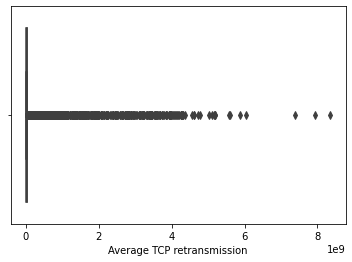

In [141]:
sns.boxplot(experience_df['Average TCP retransmission'])

In [142]:
# Detecting the Outliera and replacing with the mean
nan=np.where(experience_df['Average TCP retransmission']>21816215)
experience_df['Average TCP retransmission'].fillna(experience_df['Average TCP retransmission'].median(), inplace=True)

<AxesSubplot:xlabel='Average TCP retransmission'>

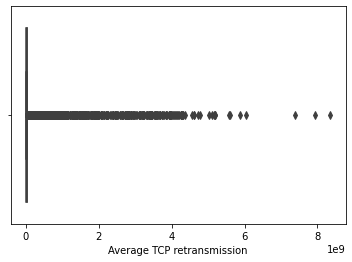

In [143]:
sns.boxplot(experience_df['Average TCP retransmission'])

<AxesSubplot:xlabel='Average RTT'>

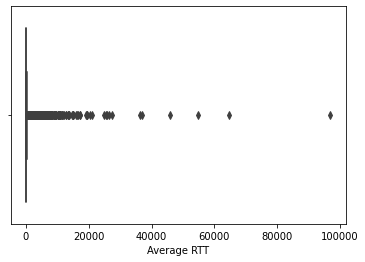

In [144]:
sns.boxplot(experience_df['Average RTT'])

In [145]:
# Position of the Outlier
nan=np.where(experience_df['Average RTT']>139)
experience_df['Average RTT'].fillna(experience_df['Average RTT'].median(), inplace=True)

<AxesSubplot:xlabel='Average RTT'>

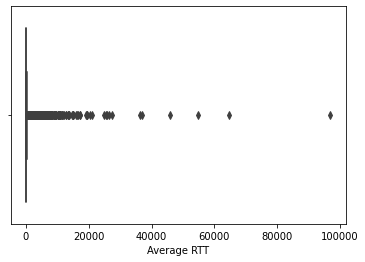

In [146]:
sns.boxplot(experience_df['Average RTT'])

<AxesSubplot:xlabel='Average throughput'>

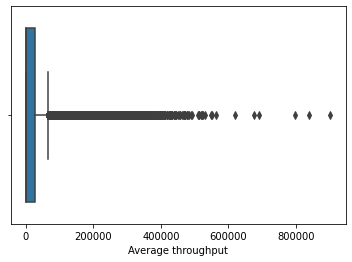

In [147]:
sns.boxplot(experience_df['Average throughput'])

In [148]:
# Position of the Outlier
nan=np.where(experience_df['Average throughput']>26531)
experience_df['Average throughput'].fillna(experience_df['Average throughput'].median(), inplace=True)

<AxesSubplot:xlabel='Average throughput'>

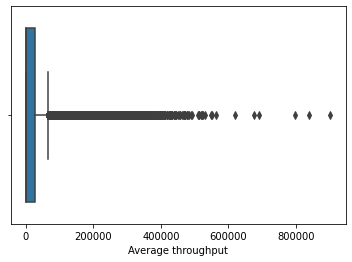

In [149]:
sns.boxplot(experience_df['Average throughput'])

In [151]:
experience_df.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['MSISDN/Number', 'Handset Type', 'Average TCP retransmission',
       'Average RTT', 'Average throughput'],
      dtype='object')>

In [156]:
# k-means (k=3) to classify customers in three groups of engagement.

kmeans = KMeans(n_clusters=3, random_state=0).fit(experience_df)
kmeans.labels_

array([0, 0, 0, ..., 0, 2, 1])

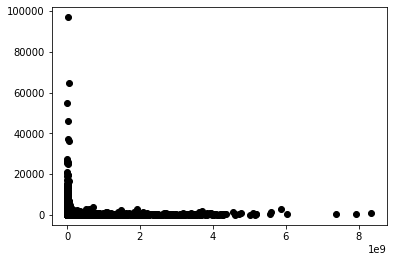

In [157]:
X = experience_df
#Visualise data points
#,X['Average throughput']
plt.scatter(X['Average TCP retransmission'],X['Average RTT'],c='black')

plt.show()

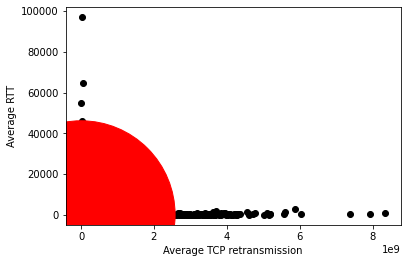

In [158]:
K=3

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X['Average TCP retransmission'],X['Average RTT'],c='black')
plt.scatter(Centroids['Average TCP retransmission'],Centroids['Average RTT'],Centroids['Average throughput'],c='red')
plt.xlabel('Average TCP retransmission')
plt.ylabel('Average RTT')

plt.show()

In [160]:
# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c['Average TCP retransmission']-row_d['Average TCP retransmission'])**2
            d2=(row_c['Average RTT']-row_d['Average RTT'])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[['Average RTT','Average TCP retransmission']]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['Average RTT'] - Centroids['Average RTT']).sum() + (Centroids_new['Average RTT'] - Centroids['Average RTT']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[['Average TCP retransmission','Average RTT']]

335.42923534079347
323.3153749743989
-6.884240121826508
-19.831506993846347
9.716521253613337
10.301940388224523
3.825189018301785
-2.2214156342130877
0.024757026559768747
0.01569587650055837
0.0


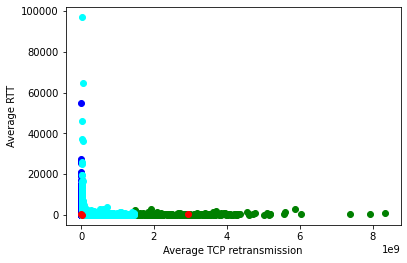

In [161]:
color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data['Average TCP retransmission'],data['Average RTT'],c=color[k])
plt.scatter(Centroids['Average TCP retransmission'],Centroids['Average RTT'],c='red')
plt.xlabel('Average TCP retransmission')
plt.ylabel('Average RTT')
plt.show()

In [165]:
from sklearn.metrics.pairwise import euclidean_distances

In [168]:
data.head()

,MSISDN/Number,Handset Type,Average TCP retransmission,Average RTT,Average throughput,1,2,3,Cluster
0,3.360100e+10,1,21802465.0,46.0,76.0,1.951313e+07,2.908128e+09,1.056129e+07,3
1,3.360100e+10,1,21802465.0,31.0,99.0,1.951313e+07,2.908128e+09,1.056129e+07,3
2,3.360100e+10,1,21802465.0,122.0,97.0,1.951313e+07,2.908128e+09,1.056129e+07,3
4,3.360101e+10,2,31173297.0,119.0,56844.0,2.888396e+07,2.898758e+09,1.190454e+06,3
5,3.360101e+10,2,22577107.0,146.0,7908.0,2.028777e+07,2.907354e+09,9.786644e+06,3


In [176]:
x= data.to_numpy()

In [ ]:

engagement_score=[]
for i in x:
    engagement_score.append(euclidean_distances([i.tolist()],[Centroids[i].tolist()]))

In [185]:
application_volumes.head()
application_volumes.to_csv('application_volumes.csv')

In [186]:
application_volumes.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['MSISDN/Number', 'Social media data vol', 'Google data vol',
       'email data vol', 'Youtube data vol', 'Netflix data vol',
       'Gaming data vol', 'Other_apps data vol'],
      dtype='object')>